In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [10]:
path = '../../data/processed'
benchmarks_df = pd.read_csv(os.path.join(path, 'a_benchmarks_2024-09-11.csv'))
schools_df = pd.read_csv(os.path.join(path, 'a_schools_2024-08-29.csv'))
courseSections_df = pd.read_csv(os.path.join(path, 'a_courseSections_2024-08-29.csv'))
courseSectionRosters_df = pd.read_csv(os.path.join(path, 'a_courseSectionRosters_2024-08-29.csv'))
scores_df = pd.read_csv(os.path.join(path, 'a_scores_2024-09-11.csv'))
vendorUsage_df = pd.read_csv(os.path.join(path, 'a_vendorUsage_2024-09-11.csv'))

/var/folders/w3/z8qntdcx62v2qmj6z9fwfhrh0000gp/T/ipykernel_1798/532526089.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  courseSectionRosters_df = pd.read_csv(os.path.join(path, 'a_courseSectionRosters_2024-08-29.csv'))


In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


# Label

## scores

In [12]:
# replace 0 with NaN
value_cols = [col for col in scores_df.columns if col.startswith('value_')]
scores_df[value_cols] = scores_df[value_cols].replace(0, np.nan)

# drop columns that only contain NaN
scores_df = scores_df.dropna(axis=1, how='all')

In [13]:
scores_df.dtypes

studentId                             int64
studentLevel                          int64
year                                  int64
measurementTypeId                     int64
subgroup_specialEd                    int64
subgroup_lunchStatus                  int64
subgroup_gender                       int64
subgroup_ethnicity                    int64
subgroup_ell                          int64
subgroup_bottom25                     int64
value_actMathScore                  float64
value_actEnglishScore               float64
value_actReadingScore               float64
value_actScienceScore               float64
value_actCompositeScore             float64
value_nweaMath                      float64
value_nweaReading                   float64
value_iReadyMath                    float64
value_iReadyReading                 float64
value_actMasteryComposite           float64
value_actMasteryReading             float64
value_actMasteryMath                float64
value_actMasteryScience         

In [14]:
# remove columns that only contain zeros
scores_df = scores_df.loc[:, (scores_df != 0).any()]
scores_df.shape

(303750, 58)

In [15]:
scores_df.head()

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,value_actMathScore,value_actEnglishScore,value_actReadingScore,value_actScienceScore,value_actCompositeScore,value_nweaMath,value_nweaReading,value_iReadyMath,value_iReadyReading,value_actMasteryComposite,value_actMasteryReading,value_actMasteryMath,value_actMasteryScience,value_actMasteryEnglish,value_nweaELA,value_scantronMath,value_scantronReading,value_mapMath,value_mapReading,value_mapRLA,value_scantronScience,value_scantronLanguage,value_ReadingFoundations,value_actELAScore,value_mapScience,value_LeapELAScale,value_LeapMathScale,value_LeapALScale,value_LeapE2Scale,value_LeapGmScale,value_LeapBlScale,value_LeapE3Scale,value_LeapUsScale,value_E1Scale,value_UsEsScale,value_accessReadingScale,value_accessReadingProficiency,value_accessCompositeScale,value_accesscompositeProficiency,value_dibelsReading,value_mapHistory,value_LEAPSocSci,value_MathMilestones,value_ELAMilestones,value_starReading,value_starMath,value_ScienceMilestones,value_SocialMilestones
0,44774,9,2018,6,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44774,8,2017,6,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2841.0,2950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,44774,8,2017,4,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2808.0,2936.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,44775,8,2017,4,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2580.0,2660.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,44775,8,2017,6,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2705.0,2670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
pd.set_option('display.max_columns', None)

In [17]:
print(f"specialEd {scores_df['subgroup_specialEd'].nunique()}")
print(f"lunchStatus {scores_df['subgroup_lunchStatus'].nunique()}")
print(f"gender {scores_df['subgroup_gender'].nunique()}")
print(f"ethnicity {scores_df['subgroup_ethnicity'].nunique()}")
print(f"ell {scores_df['subgroup_ell'].nunique()}")
print(f"bottom25 {scores_df['subgroup_bottom25'].nunique()}")


specialEd 6
lunchStatus 5
gender 5
ethnicity 5
ell 2
bottom25 2


In [18]:
# TODO map this to key

subgroups = ['subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25']

for subgroup in subgroups:
    print(f"\n{subgroup} value counts:")
    print(scores_df[subgroup].value_counts())
    print(f"Total unique values: {scores_df[subgroup].nunique()}")


subgroup_specialEd value counts:
subgroup_specialEd
0       290283
7         8212
6         4296
1          899
2           47
1000        13
Name: count, dtype: int64
Total unique values: 6

subgroup_lunchStatus value counts:
subgroup_lunchStatus
0    282087
1      9120
5      6268
6      6240
3        35
Name: count, dtype: int64
Total unique values: 5

subgroup_gender value counts:
subgroup_gender
0    289238
5      6422
6      6086
4      1774
3       230
Name: count, dtype: int64
Total unique values: 5

subgroup_ethnicity value counts:
subgroup_ethnicity
0     289238
18      8632
17      3876
10      1872
9        132
Name: count, dtype: int64
Total unique values: 5

subgroup_ell value counts:
subgroup_ell
0    303746
3         4
Name: count, dtype: int64
Total unique values: 2

subgroup_bottom25 value counts:
subgroup_bottom25
0    298640
1      5110
Name: count, dtype: int64
Total unique values: 2


In [19]:
# Filter scores_df to only include columns that are in benchmarks_df
benchmarks_list = list(benchmarks_df['dataSource'].unique())
value_cols = [col for col in scores_df.columns if col.startswith('value_')]
value_cols = [col for col in value_cols if col in benchmarks_list]
scores_df = scores_df[[col for col in scores_df.columns if col in value_cols or not col.startswith('value_')]]

In [20]:
# Count of available test scores by student level and dataSource
scores_count = pd.pivot_table(scores_df, values=value_cols, index='studentLevel', aggfunc='count')
scores_count = scores_count.fillna(0)
scores_count = scores_count.sort_index()

In [21]:
scores_count = scores_count[[col for col in scores_count.columns if col in benchmarks_list]]
scores_count
# scores_count.to_csv('scores_count.csv')

,value_actCompositeScore,value_actEnglishScore,value_actMathScore,value_actReadingScore,value_actScienceScore,value_scantronMath,value_scantronReading,value_starMath
studentLevel,,,,,,,,
-1,0,0,0,0,0,0,0,0
0,52,52,52,52,52,743,263,1
1,0,0,0,0,0,4257,1171,132
2,0,0,0,0,0,9091,5206,468
3,0,0,0,0,0,19893,19952,2075
4,0,0,0,0,0,20400,20036,2111
5,0,0,0,0,0,20317,20391,1969
6,2,2,2,2,2,19777,19914,1919
7,3,3,3,3,3,19277,19317,1728


In [22]:
scores_df.describe()

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,value_actMathScore,value_actEnglishScore,value_actReadingScore,value_actScienceScore,value_actCompositeScore,value_scantronMath,value_scantronReading,value_starMath
count,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,303750.000000,5258.000000,5257.000000,5256.000000,5257.000000,5387.000000,138909.000000,135354.000000,12120.000000
mean,131440.302008,6.004998,2017.208234,2.757402,0.320174,0.256807,0.251562,0.793995,0.000040,0.016823,17.494675,17.194598,18.185502,17.958151,17.775758,2468.174891,2657.883387,2156.357096
std,57982.885934,5.916790,10.375606,1.281897,6.673339,1.104788,1.134392,3.593934,0.010887,0.128608,3.747356,5.663307,5.614616,4.653455,4.406411,292.296221,387.769632,731.353115
min,44774.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,3.000000,1.000000,1.000000,7.000000,1000.000000,1000.000000,170.000000
25%,85484.000000,4.000000,2017.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,13.000000,14.000000,15.000000,14.000000,2312.000000,2425.000000,2160.750000
50%,121078.000000,6.000000,2017.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,16.000000,17.000000,18.000000,17.000000,2491.000000,2714.000000,2424.000000
75%,169950.000000,8.000000,2018.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,21.000000,22.000000,21.000000,20.375000,2651.000000,2943.000000,2594.000000
max,259514.000000,99.000000,2020.000000,7.000000,1000.000000,6.000000,6.000000,18.000000,3.000000,1.000000,36.000000,36.000000,36.000000,36.000000,35.000000,3700.000000,3700.000000,3247.000000


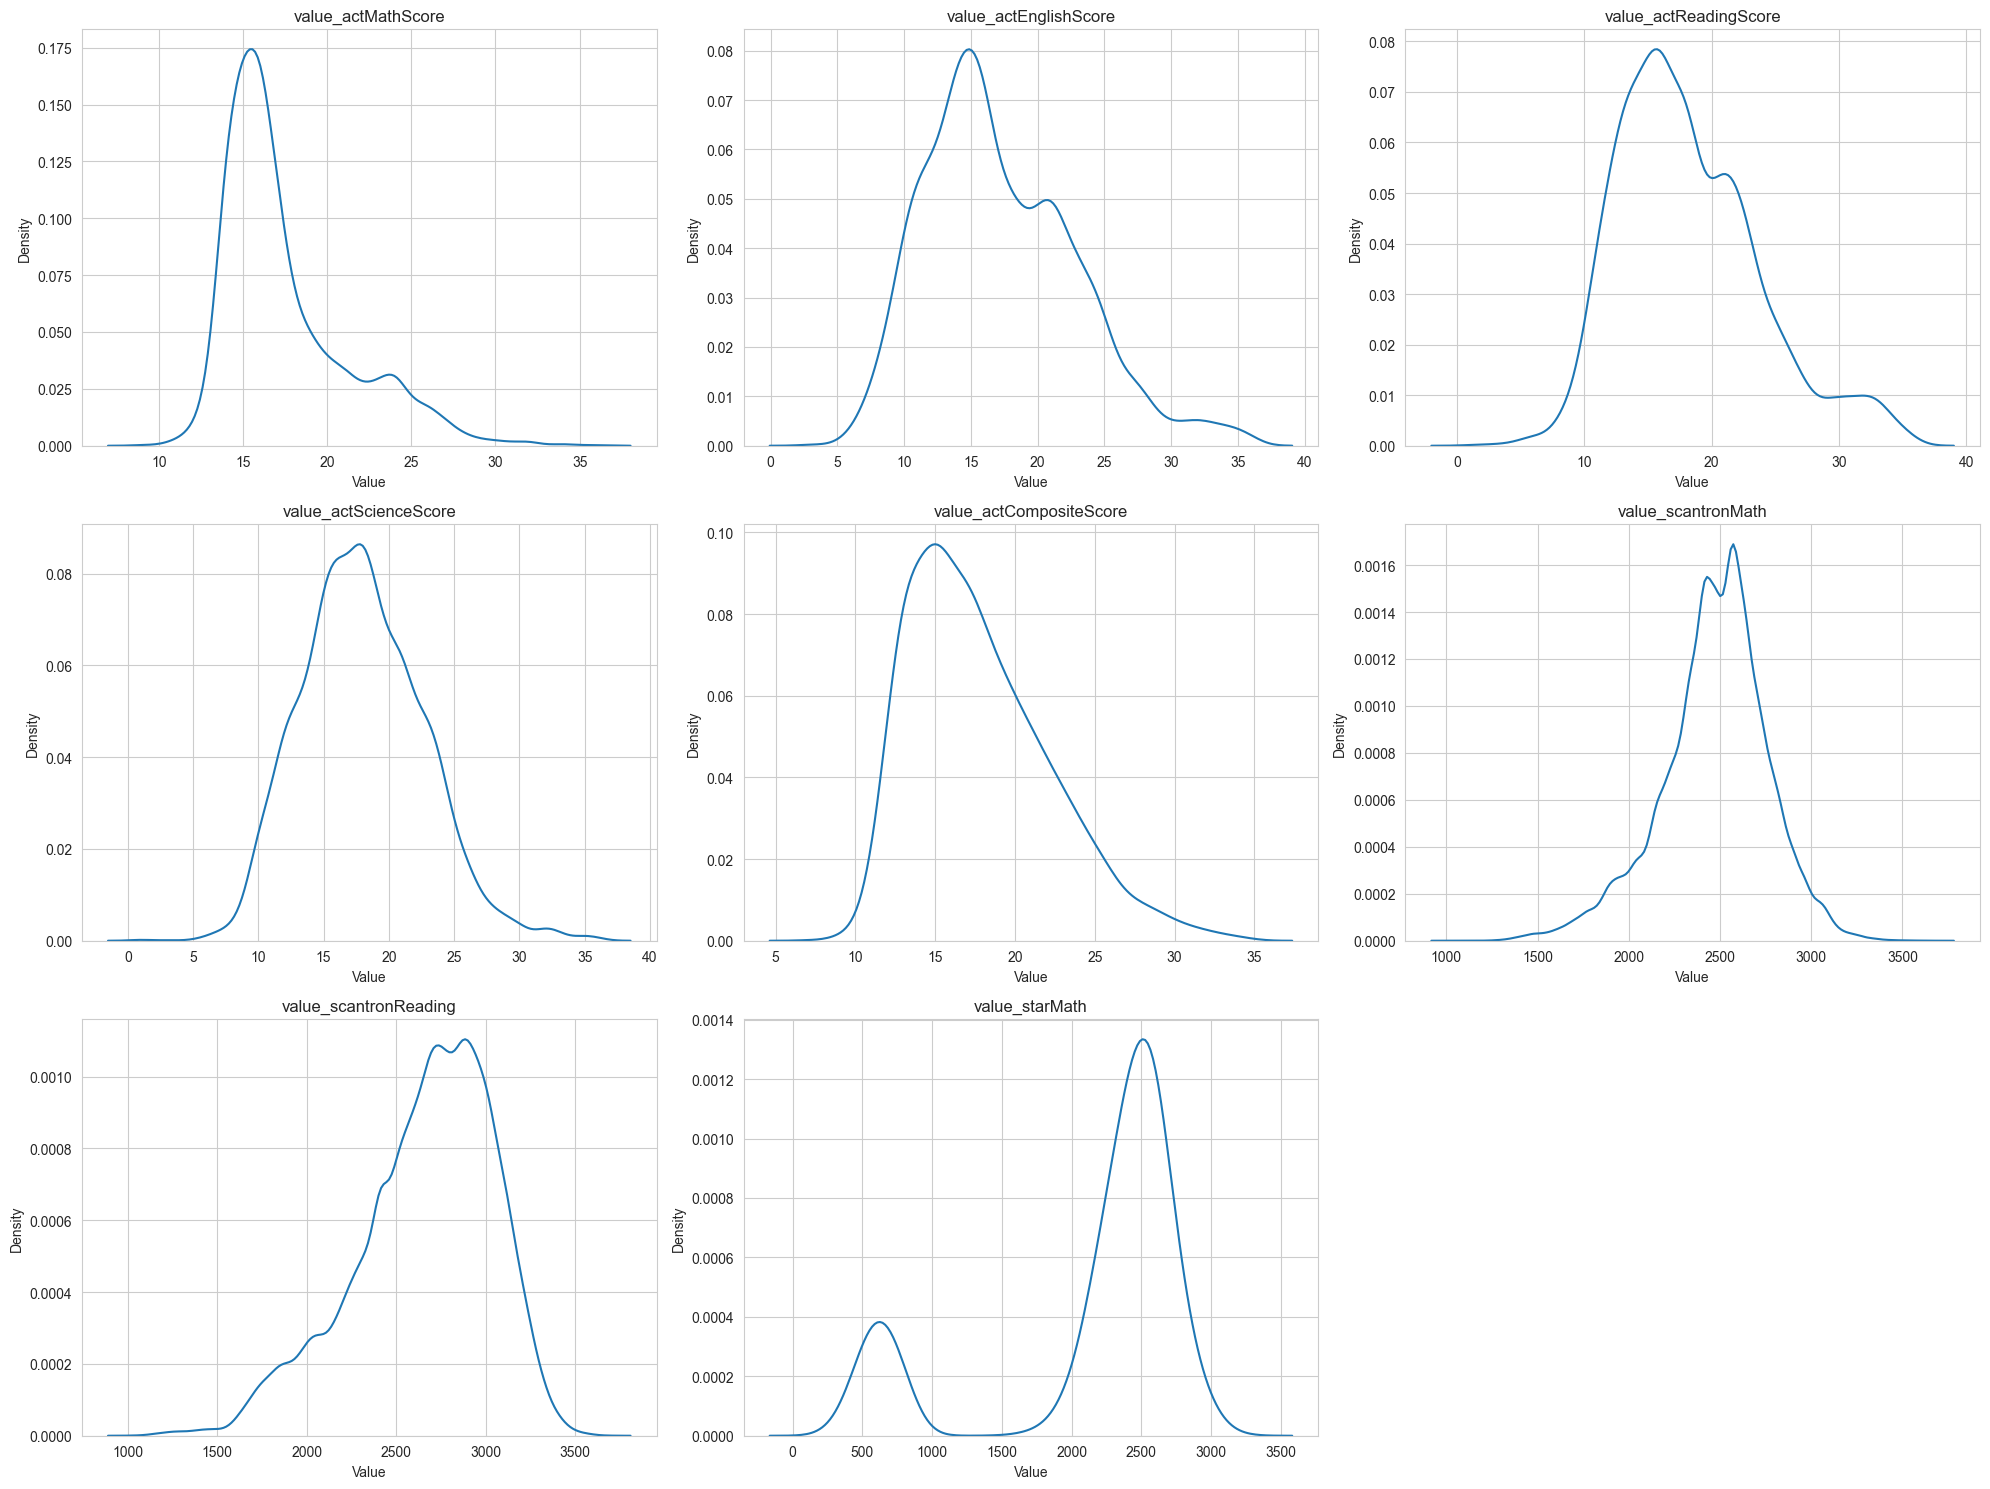

In [23]:
# Create a figure with subplots for each value column
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(value_cols) + n_cols - 1) // n_cols  # Calculate number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, column in enumerate(value_cols):
    # Remove rows with NaN values for the current column
    data = scores_df[column].dropna()
    
    # Plot KDE
    sns.kdeplot(data=data, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## benchmarks

In [24]:
print("benchmarks_df")
print(benchmarks_df.shape)
print(benchmarks_df.columns)

benchmarks_df
(42, 5)
Index(['districtId', 'year', 'level', 'dataSource', 'value'], dtype='object')


In [25]:
benchmarks_df.rename(columns={'value': 'threshold'}, inplace=True)

In [26]:
benchmarks_df

,districtId,year,level,dataSource,threshold
0,45,2017,3,value_scantronMath,2356.0
1,45,2017,3,value_scantronReading,2563.0
2,45,2017,4,value_scantronMath,2493.0
3,45,2017,4,value_scantronReading,2674.0
4,45,2017,5,value_scantronMath,2584.0
5,45,2017,5,value_scantronReading,2841.0
6,45,2017,6,value_scantronMath,2675.0
7,45,2017,6,value_scantronReading,2897.0
8,45,2017,7,value_scantronMath,2766.0
9,45,2017,7,value_scantronReading,3008.0


## Create boolean proficiency label by merging scores_df and benchmarks_df

In [27]:
# Remove 'value_aspireReadingScaleScore' from benchmarks_list because it is not in scores_df
benchmarks_list.remove('value_aspireReadingScaleScore')
benchmarks_list

['value_scantronMath',
 'value_scantronReading',
 'value_actCompositeScore',
 'value_starMath',
 'value_actMathScore',
 'value_actReadingScore',
 'value_actEnglishScore',
 'value_actScienceScore']

In [28]:
# Step 1: Select only columns starting with 'value_' and keep 'studentId', 'studentLevel', 'year'
selected_columns = ['studentId', 'studentLevel', 'year'] + benchmarks_list
scores_subset = scores_df[selected_columns]
scores_subset.head()

,studentId,studentLevel,year,value_scantronMath,value_scantronReading,value_actCompositeScore,value_starMath,value_actMathScore,value_actReadingScore,value_actEnglishScore,value_actScienceScore
0,44774,9,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44774,8,2017,2841.0,2950.0,NaN,NaN,NaN,NaN,NaN,NaN
2,44774,8,2017,2808.0,2936.0,NaN,NaN,NaN,NaN,NaN,NaN
3,44775,8,2017,2580.0,2660.0,NaN,NaN,NaN,NaN,NaN,NaN
4,44775,8,2017,2705.0,2670.0,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Step 2: Melt the scores_subset to create a long format
scores_long = scores_subset.melt(
    id_vars=['studentId', 'studentLevel', 'year'], 
    var_name='dataSource', 
    value_name='score'
)

# Step 3: Rename 'studentLevel' to 'level' to match benchmarks_df
scores_long.rename(columns={'studentLevel': 'level'}, inplace=True)

# Step 4: Remove the 'value_' prefix from the dataSource column
# scores_long['dataSource'] = scores_long['dataSource'].str.replace('value_', '', regex=False)

# Step 5: Drop rows with NaN scores
scores_long.dropna(subset=['score'], inplace=True)

scores_long.head(20)

,studentId,level,year,dataSource,score
1,44774,8,2017,value_scantronMath,2841.0
2,44774,8,2017,value_scantronMath,2808.0
3,44775,8,2017,value_scantronMath,2580.0
4,44775,8,2017,value_scantronMath,2705.0
7,44776,8,2017,value_scantronMath,2335.0
8,44776,8,2017,value_scantronMath,2193.0
9,44777,6,2017,value_scantronMath,2493.0
10,44777,6,2017,value_scantronMath,2631.0
12,44777,7,2018,value_scantronMath,2585.0
13,44777,7,2018,value_scantronMath,2486.0


In [30]:
# Step 6: Merge the long-format scores with the benchmarks
proficiency_melted_df = pd.merge(
    scores_long, 
    benchmarks_df[['year', 'level', 'dataSource', 'threshold']], 
    on=['year', 'level', 'dataSource'], 
    how='left'
)

# Check for any missing values after the merge
missing_benchmarks = proficiency_melted_df['threshold'].isna().sum()
print(f"Number of scores without corresponding benchmark: {missing_benchmarks}")

proficiency_melted_df.dropna(subset=['threshold'], inplace=True)
proficiency_melted_df.head(10)

Number of scores without corresponding benchmark: 58641


,studentId,level,year,dataSource,score,threshold
0,44774,8,2017,value_scantronMath,2841.0,2823.0
1,44774,8,2017,value_scantronMath,2808.0,2823.0
2,44775,8,2017,value_scantronMath,2580.0,2823.0
3,44775,8,2017,value_scantronMath,2705.0,2823.0
4,44776,8,2017,value_scantronMath,2335.0,2823.0
5,44776,8,2017,value_scantronMath,2193.0,2823.0
6,44777,6,2017,value_scantronMath,2493.0,2675.0
7,44777,6,2017,value_scantronMath,2631.0,2675.0
8,44777,7,2018,value_scantronMath,2585.0,2743.0
9,44777,7,2018,value_scantronMath,2486.0,2743.0


In [31]:
# Step 7: Create the proficiency label
proficiency_melted_df['is_proficient'] = proficiency_melted_df['score'] >= proficiency_melted_df['threshold']
print(proficiency_melted_df.shape)
proficiency_melted_df.head(10)

(254157, 7)


,studentId,level,year,dataSource,score,threshold,is_proficient
0,44774,8,2017,value_scantronMath,2841.0,2823.0,True
1,44774,8,2017,value_scantronMath,2808.0,2823.0,False
2,44775,8,2017,value_scantronMath,2580.0,2823.0,False
3,44775,8,2017,value_scantronMath,2705.0,2823.0,False
4,44776,8,2017,value_scantronMath,2335.0,2823.0,False
5,44776,8,2017,value_scantronMath,2193.0,2823.0,False
6,44777,6,2017,value_scantronMath,2493.0,2675.0,False
7,44777,6,2017,value_scantronMath,2631.0,2675.0,False
8,44777,7,2018,value_scantronMath,2585.0,2743.0,False
9,44777,7,2018,value_scantronMath,2486.0,2743.0,False


In [32]:
# Step 8: Pivot the result back to wide format
proficiency_df = proficiency_melted_df.pivot_table(
    index=['studentId', 'level', 'year'],
    columns='dataSource',
    values='is_proficient'
)

# Reset the index to make 'studentId', 'level', and 'year' regular columns
proficiency_df.reset_index(inplace=True)

# Rename columns to indicate they are proficiency indicators
proficiency_df.rename(
    columns=lambda x: f'proficient_{x.replace("value_", "")}' if x not in ['studentId', 'level', 'year'] else x,
    inplace=True
)

# Merge the proficiency indicators back with the original scores_df
proficiency_df = pd.merge(scores_df, proficiency_df, 
                    left_on=['studentId', 'studentLevel', 'year'],
                    right_on=['studentId', 'level', 'year'],
                    how='left')

# Remove the redundant 'level' column from the merge
proficiency_df.drop('level', axis=1, inplace=True)

# Display the first few rows of the resulting DataFrame
proficiency_df.head()

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,value_actMathScore,value_actEnglishScore,value_actReadingScore,value_actScienceScore,value_actCompositeScore,value_scantronMath,value_scantronReading,value_starMath,proficient_actCompositeScore,proficient_actEnglishScore,proficient_actMathScore,proficient_actReadingScore,proficient_actScienceScore,proficient_scantronMath,proficient_scantronReading,proficient_starMath
0,44774,9,2018,6,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44774,8,2017,6,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2841.0,2950.0,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.0,NaN
2,44774,8,2017,4,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2808.0,2936.0,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.0,NaN
3,44775,8,2017,4,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2580.0,2660.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,44775,8,2017,6,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2705.0,2670.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


/var/folders/w3/z8qntdcx62v2qmj6z9fwfhrh0000gp/T/ipykernel_1798/1020944851.py:3: RuntimeWarning: invalid value encountered in scalar divide
  col: lambda x: x.sum() / x.count() * 100


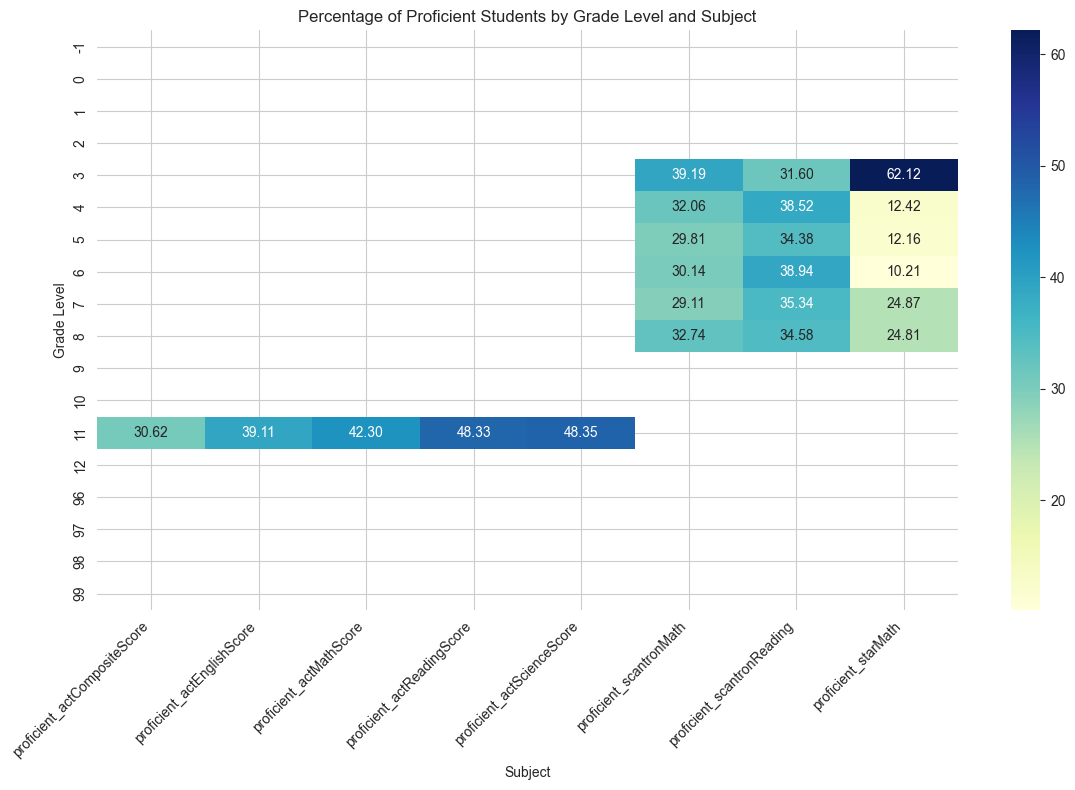

In [33]:
# Calculate the percentage of proficient students for each grade level and value
proficiency_percentage = proficiency_df.groupby('studentLevel').agg({
    col: lambda x: x.sum() / x.count() * 100
    for col in proficiency_df.columns if col.startswith('proficient_')
})

plt.figure(figsize=(12, 8))
sns.heatmap(proficiency_percentage, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Percentage of Proficient Students by Grade Level and Subject')
plt.xlabel('Subject')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Grade Level')
plt.tight_layout()
plt.show()


# Features

## subgroups

In [27]:
subgroups_df = scores_df[['studentId', 'studentLevel'] + subgroups]
subgroups_df = subgroups_df.drop_duplicates(subset='studentId')

subgroups_3_to_8 = subgroups_df[subgroups_df['studentLevel'].isin([3, 4, 5, 6, 7, 8])]
subgroups_11 = subgroups_df[subgroups_df['studentLevel'] == 11]

In [28]:
scores_df['subgroup_gender'].value_counts()

subgroup_gender
0    289238
5      6422
6      6086
4      1774
3       230
Name: count, dtype: int64

In [29]:
ethnicity = {
    '1': 'White',
    '3': 'Black / African American',
    '4': 'Asian',
    '5': 'Hispanic Or Latino',
    '6': 'American Indian / Alaskan Native',
    '7': 'Multi Race - Two or More Races',
    '8': 'Native Hawaiian / Other Pacific Islander',
}


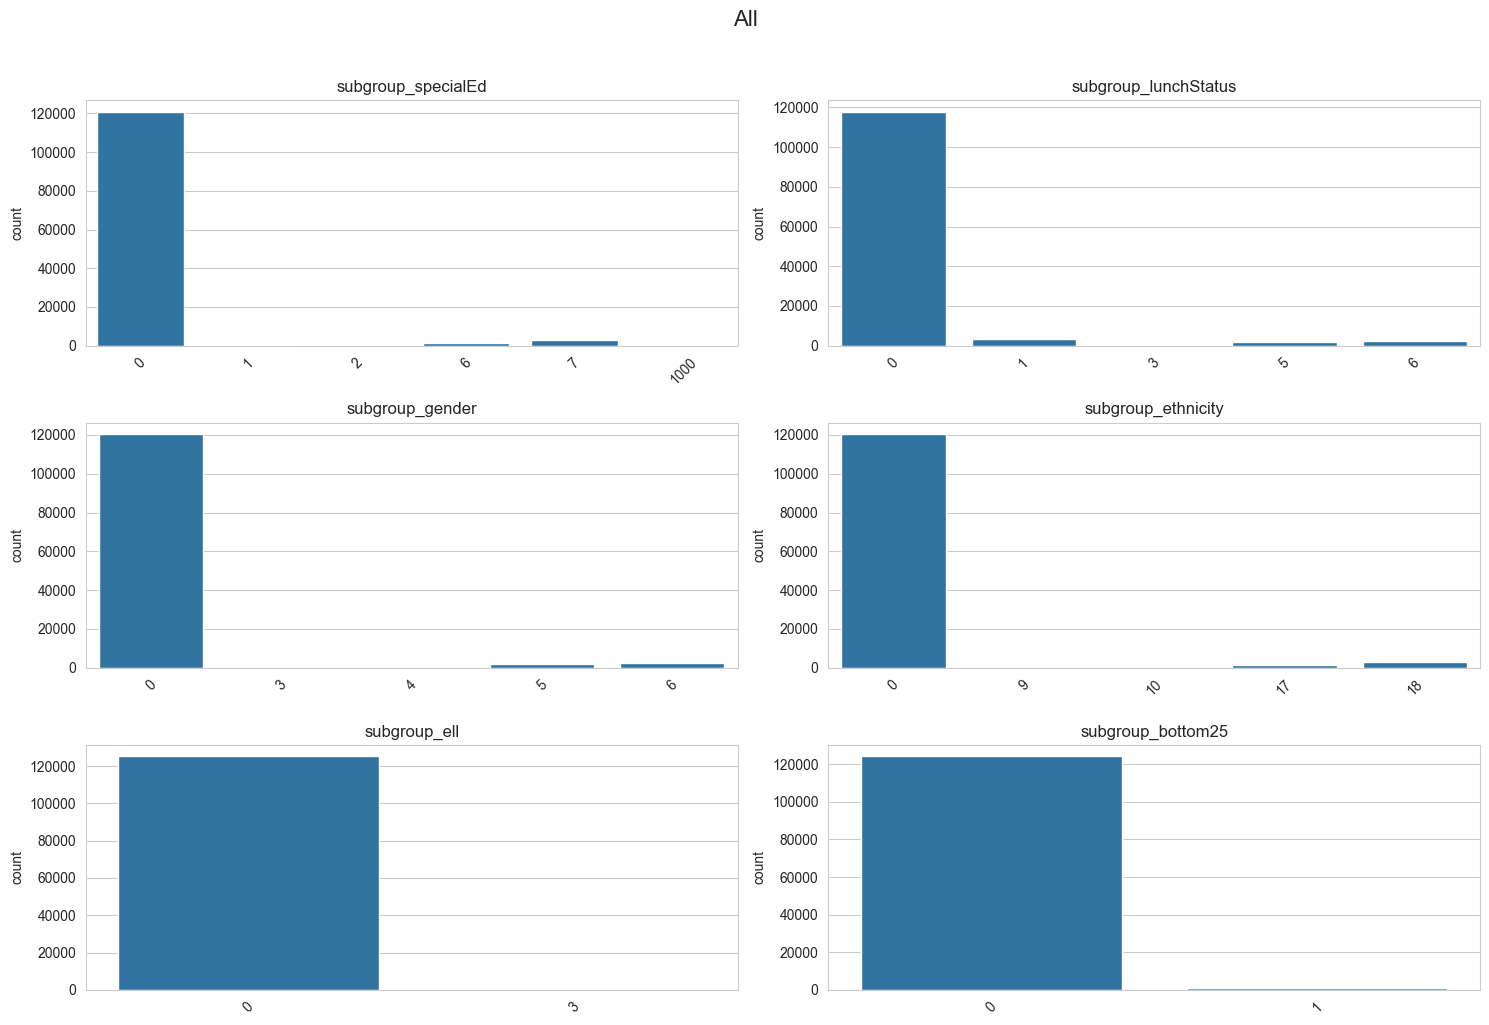

In [30]:
plt.figure(figsize=(15, 10))
plt.suptitle('All', fontsize=16, y=1.02)

for i, subgroup in enumerate(subgroups, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=subgroups_df.drop_duplicates(subset=['studentId']), x=subgroup)
    plt.title(f'{subgroup}')
    plt.xticks(rotation=45)
    plt.xlabel('')
    
plt.tight_layout()
plt.show()

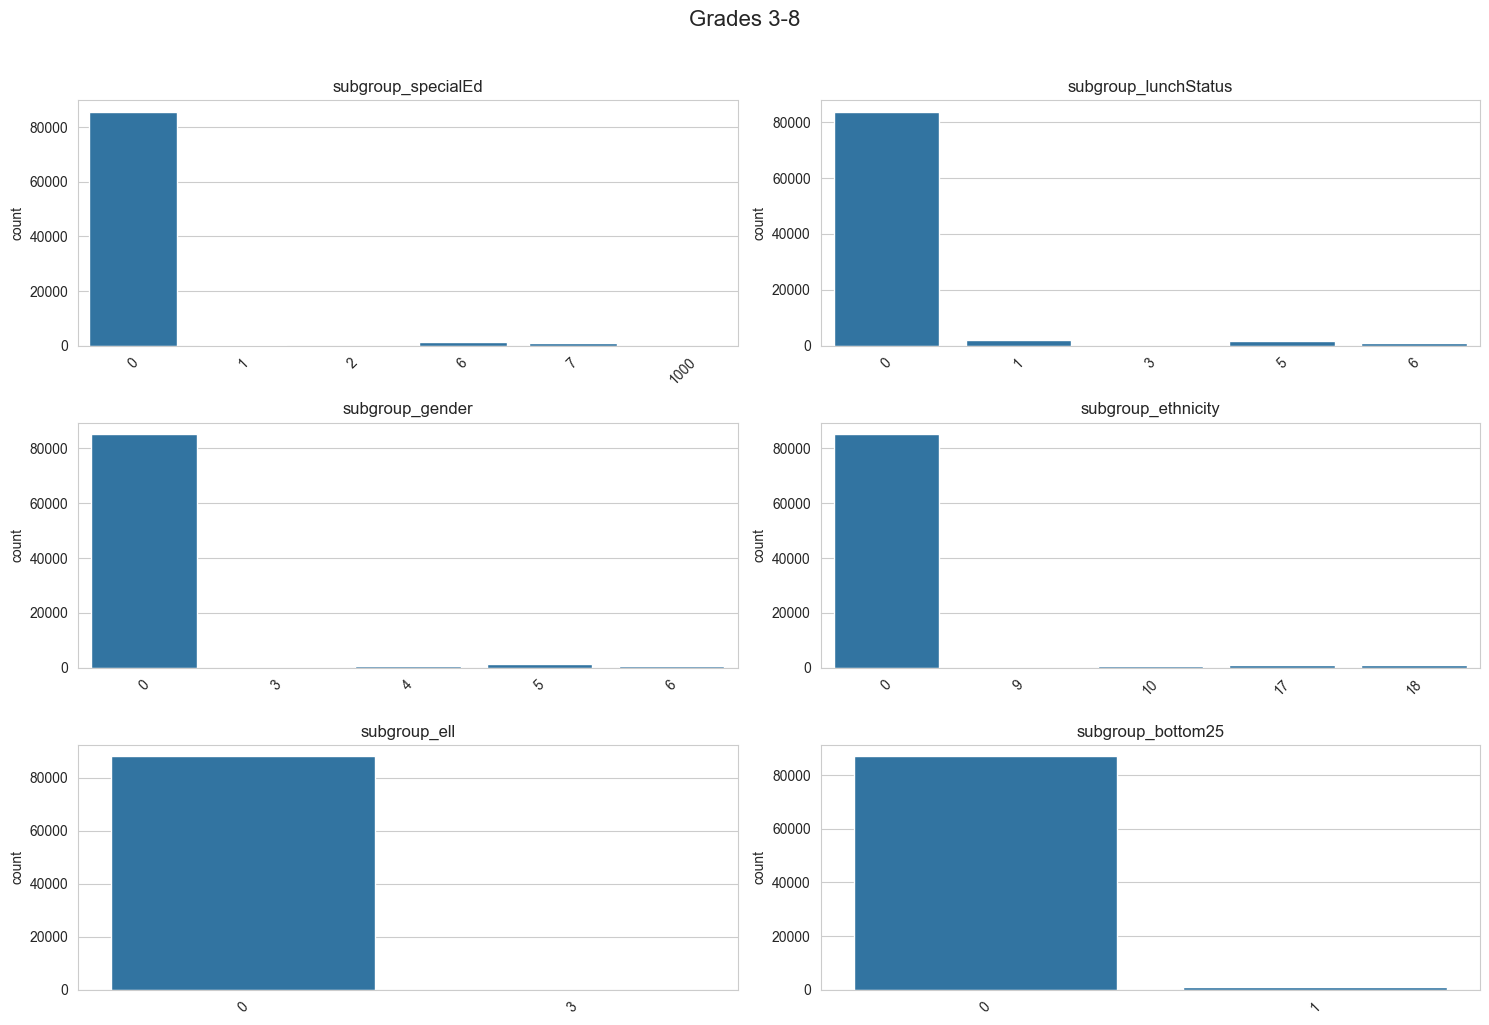

In [31]:
plt.figure(figsize=(15, 10))
plt.suptitle('Grades 3-8', fontsize=16, y=1.02)

for i, subgroup in enumerate(subgroups, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=subgroups_3_to_8, x=subgroup)
    plt.title(f'{subgroup}')
    plt.xticks(rotation=45)
    plt.xlabel('')
    
plt.tight_layout()
plt.show()

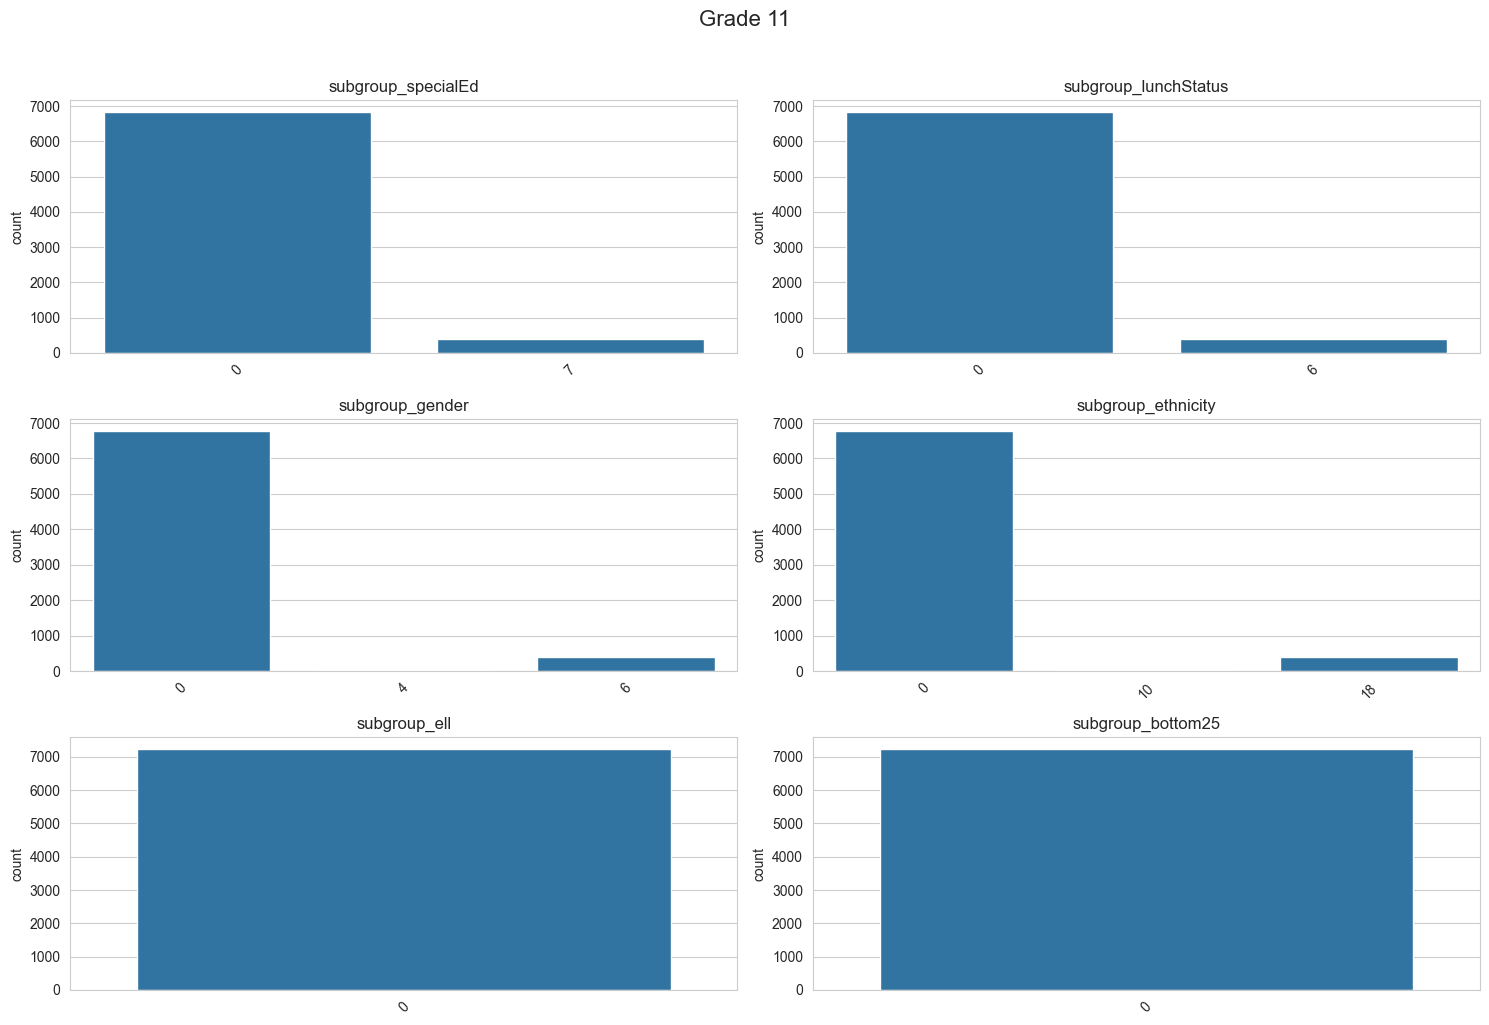

In [32]:
plt.figure(figsize=(15, 10))
plt.suptitle('Grade 11', fontsize=16, y=1.02)

for i, subgroup in enumerate(subgroups, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=subgroups_11, x=subgroup)
    plt.title(f'{subgroup}')
    plt.xticks(rotation=45)
    plt.xlabel('')
    
plt.tight_layout()
plt.show()

## schools

In [33]:
print("schools_df")
print(schools_df.shape)
print(schools_df.columns)

schools_df
(20, 8)
Index(['id', 'name', 'districtId', 'costCenter', 'abbreviation',
       'acqRequestSelectable', 'oneRoster_sourcedId', 'oneRoster_ticketId'],
      dtype='object')


In [34]:
schools_df

,id,name,districtId,costCenter,abbreviation,acqRequestSelectable,oneRoster_sourcedId,oneRoster_ticketId
0,222,Elementary A,45,5,EES,1,NaN,0
1,223,Middle School A,45,8,EMS,1,NaN,0
2,224,High School A,45,10,ECHS,1,NaN,0
3,225,Junior High B,45,12,ECJH,1,NaN,0
4,226,Elementary School B,45,18,HES,1,NaN,0
5,227,Middle School C,45,19,HMS,1,NaN,0
6,228,High School B,45,20,HHS,1,NaN,0
7,229,Middle School D,45,23,MJH,1,NaN,0
8,230,Elementary School C,45,30,RSE,1,NaN,0
9,231,Elementary School D,45,35,CES,1,NaN,0


## courseSections

In [35]:
print("courseSections_df")
print(courseSections_df.shape)
print(courseSections_df.columns)

courseSections_df
(17662, 4)
Index(['id', 'vanityId', 'year', 'schoolId'], dtype='object')


In [36]:
courseSections_df.dtypes

id           int64
vanityId    object
year         int64
schoolId     int64
dtype: object

In [37]:
courseSections_df.head()

,id,vanityId,year,schoolId
0,40388,PE 4,2015,222
1,40389,READING 4,2015,222
2,40390,HmroomPK6,2015,222
3,40391,LANGUAGE 4,2015,222
4,40392,SCIENCE 4,2015,222


## courseSectionRosters

In [38]:
print("courseSectionRosters_df")
print(courseSectionRosters_df.shape)
print(courseSectionRosters_df.columns)

courseSectionRosters_df
(612241, 5)
Index(['id', 'courseSectionId', 'studentId', 'studentLevel', 'ticket'], dtype='object')


In [39]:
courseSectionRosters_df.head()

,id,courseSectionId,studentId,studentLevel,ticket
0,1047696,39975,45333,4,NaN
1,1047704,39975,56116,4,NaN
2,1047706,39975,45345,4,NaN
3,1047715,39975,45400,4,NaN
4,1047729,39975,45413,4,NaN


In [40]:
if 'vanityId' not in courseSectionRosters_df.columns:
    courseSectionRosters_df = pd.merge(courseSectionRosters_df, courseSections_df[['id', 'vanityId', 'year', 'schoolId']], left_on='courseSectionId', right_on='id', how='left')
    courseSectionRosters_df = courseSectionRosters_df.drop(columns=['id_y'])
    courseSectionRosters_df = courseSectionRosters_df.rename(columns={'id_x': 'id'})

courseSectionRosters_df.head()

,id,courseSectionId,studentId,studentLevel,ticket,vanityId,year,schoolId
0,1047696,39975,45333,4,NaN,MathGrade 4,2015,232
1,1047704,39975,56116,4,NaN,MathGrade 4,2015,232
2,1047706,39975,45345,4,NaN,MathGrade 4,2015,232
3,1047715,39975,45400,4,NaN,MathGrade 4,2015,232
4,1047729,39975,45413,4,NaN,MathGrade 4,2015,232


In [41]:
# Group by vanityId (course name) and courseSectionId, then count students
course_sizes = courseSectionRosters_df.groupby(['vanityId', 'courseSectionId'])['studentId'].count().reset_index()

# Calculate average size for each course
average_course_sizes = pd.DataFrame(course_sizes.groupby('vanityId')['studentId'].mean().sort_values(ascending=False))

# Display the results
average_course_sizes.head(50)

,studentId
vanityId,
District Wide - IS,26829.750000
District Wide - ISS,26829.750000
District Wide - GA,11543.333333
Schoolwide -237sID,1490.750000
Schoolwide -229sID,1231.000000
Schoolwide -236sID,1182.000000
Schoolwide -233sID,1140.000000
Schoolwide -235sID,992.250000
Schoolwide -231sID,970.250000


### 11 grade

In [42]:
courseSectionRosters_df.head()

,id,courseSectionId,studentId,studentLevel,ticket,vanityId,year,schoolId
0,1047696,39975,45333,4,NaN,MathGrade 4,2015,232
1,1047704,39975,56116,4,NaN,MathGrade 4,2015,232
2,1047706,39975,45345,4,NaN,MathGrade 4,2015,232
3,1047715,39975,45400,4,NaN,MathGrade 4,2015,232
4,1047729,39975,45413,4,NaN,MathGrade 4,2015,232


In [43]:
# Select 10th grade in 2017 (where label is ACT in 2018)
courseSectionRosters_11 = courseSectionRosters_df[courseSectionRosters_df['studentLevel'] == 10]
courseSectionRosters_11 = courseSectionRosters_11[courseSectionRosters_df['year'] == 2017]

# Drop rows where vanityId contains "District Wide" or "Schoolwide"
courseSectionRosters_11 = courseSectionRosters_11[~courseSectionRosters_11['vanityId'].str.contains('District Wide', case=False, na=False)]
courseSectionRosters_11 = courseSectionRosters_11[~courseSectionRosters_11['vanityId'].str.contains('Schoolwide', case=False, na=False)]
courseSectionRosters_11['vanityId'].value_counts()

/var/folders/w3/z8qntdcx62v2qmj6z9fwfhrh0000gp/T/ipykernel_89513/1330554944.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  courseSectionRosters_11 = courseSectionRosters_11[courseSectionRosters_df['year'] == 2017]


vanityId
Physical Sci    503
English Gr10    491
D&TSafetyEd     388
Health 9-12     378
Algebra I B     345
USHis I G10     331
Mustang Advi    284
Eng Gr10 Adv    245
Geometry        217
ChemistryAdv    195
HEALTH 9-12     189
USHis I Adv     186
DRIVERS ED      178
US His-1877     152
CareerPrep-B    143
Panther Adv     136
LIFE PE 9-12    114
Alg II/Trig     108
BullBogAdv      104
Spanish 1        74
FACS             65
Theatre I        63
Fund Agrisci     60
English Gr11     59
VisArtI.5C       58
VarFBII          57
StudyHall912     56
USHis InD-P      53
Enviro Sci       51
ARMY LET II      50
ALIITRIGH/A      47
LIFEPE9-12.5     46
Spanish 2        45
HS US 10 ADV     43
Fit/Cond         42
Intermed Agr     39
Phy Sci Adv      38
Geometry Adv     38
Agriscience      34
BandMarch.5C     33
Music App        33
Int Metl Fab     30
Hosp Tourism     27
BAND MARCH       27
BANDCONCERT      27
HISTUS1877AC     26
Food Nutritn     26
Mnt Lt Rpr A     25
ContempIss1C     24
Vis Arts I 

In [44]:
courseSectionRosters_11['schoolId'].value_counts()

schoolId
233    2563
236    2403
224    1223
228    1190
Name: count, dtype: int64

In [45]:
courseSectionRosters_11.head()

,id,courseSectionId,studentId,studentLevel,ticket,vanityId,year,schoolId
375764,2051629,73319,46413,10,NaN,W H 1500-P,2017,224
375791,2050801,73320,47091,10,NaN,Biology,2017,224
375817,2051628,73321,46413,10,NaN,Enviro Sci,2017,224
375847,2051222,73322,46705,10,NaN,Enviro Sci,2017,224
375911,2048533,73327,50738,10,NaN,LIFE PE 9-12,2017,224


In [46]:
grade_11_2017_features = set(courseSectionRosters_11['studentId'].unique())
grade_11_2018_labels = set(proficiency_df[(proficiency_df['year'] == 2018) & (proficiency_df['studentLevel'] == 11)]['studentId'].unique())
# Find the intersection of grade 11 students in 2017 and 2018
intersection = grade_11_2017_features.intersection(grade_11_2018_labels)

# Calculate the size of the intersection
intersection_size = len(intersection)

print(f"Size of intersection: {intersection_size}")
print(f"Number of students in grade 11 in 2017: {len(grade_11_2017_features)}")
print(f"Number of students with labels in 2018: {len(grade_11_2018_labels)}")


Size of intersection: 778
Number of students in grade 11 in 2017: 843
Number of students with labels in 2018: 2059


## TODO vendors
check new lookup tables

In [47]:
vendorUsage_df.head()

,id,vendorId,studentId,active,year,usageTypeId,weeklyUsageMinutes
0,11890,72609,44777,0,2018,1,0
1,11891,72609,44783,0,2018,1,0
2,11892,72609,44784,0,2018,1,0
3,11893,72609,44807,0,2018,1,0
4,11894,72609,44809,0,2018,1,0


In [48]:
for col in vendorUsage_df.columns:
    print(f"{col}: {vendorUsage_df[col].nunique()}")

id: 158007
vendorId: 23
studentId: 44176
active: 1
year: 4
usageTypeId: 13
weeklyUsageMinutes: 1


In [49]:
vendorUsage_df['usageTypeId'].value_counts()

usageTypeId
4     50310
1     47620
3     21983
6     13381
2     10945
5      8014
9      1368
7      1173
12     1117
8       974
10      808
11      273
14       41
Name: count, dtype: int64

In [50]:
import json

In [51]:
vendorUsage_df['vendorId'].unique()

array([72609, 11333, 39195, 27172, 61673, 37017, 36130, 62382, 62509,
       62508, 37269, 25405, 52447, 52448, 61544,  7273, 63431, 63432,
       22410, 63616, 23165,  7035, 11464])

In [52]:
with open('data/raw/a_vendorKey_2024-10-08.csv', 'r') as file:
    vendorKey_json = json.loads(file.read())

In [53]:
vendorKey_df = pd.json_normalize(vendorKey_json['vendors'])
vendorKey_df

,id,name,districtId,vendorNumber,acqRequestSelectable
0,11105,National 4-H Council,45,9753,0
1,11106,National Resturant Association,45,8333,0
2,11107,Snap On Industrial,45,9606,0
3,11108,American Hotel & Lodging,45,9764,0
4,11109,SCHOOLMATE.COM,45,6582,0
5,11110,AMAZON.COM,45,2127,0
6,11111,PUBLISHER S WAREHOUSE,45,1171,0
7,11112,SREB,45,6659,1
8,11113,Interplay Learning,45,10165,0
9,11114,STACI MYRICK,45,9097,0


In [54]:
vendor_id = vendorUsage_df.merge(vendorKey_df[['id', 'name']], how='left', left_on='vendorId', right_on='id')
vendor_id.head()

,id_x,vendorId,studentId,active,year,usageTypeId,weeklyUsageMinutes,id_y,name
0,11890,72609,44777,0,2018,1,0,72609.0,iReady Reading
1,11891,72609,44783,0,2018,1,0,72609.0,iReady Reading
2,11892,72609,44784,0,2018,1,0,72609.0,iReady Reading
3,11893,72609,44807,0,2018,1,0,72609.0,iReady Reading
4,11894,72609,44809,0,2018,1,0,72609.0,iReady Reading


In [55]:
vendorUsage_df.shape

(158007, 7)

In [56]:
vendor_id['name'].value_counts()

name
Curriculum Associates          46262
iReady Reading                  6794
BBB Educational Enterprises      567
Name: count, dtype: int64

# Range of all dfs

In [57]:
print("benchmarks_df columns:")
print(benchmarks_df.columns)
print("\nschools_df columns:")
print(schools_df.columns)
print("\ncourseSections_df columns:")
print(courseSections_df.columns)
print("\ncourseSectionRosters_df columns:")
print(courseSectionRosters_df.columns)
print("\nscores_df columns:")
print(scores_df.columns)
print("\nvendorUsage_df columns:")
print(vendorUsage_df.columns)

benchmarks_df columns:
Index(['districtId', 'year', 'level', 'dataSource', 'threshold'], dtype='object')

schools_df columns:
Index(['id', 'name', 'districtId', 'costCenter', 'abbreviation',
       'acqRequestSelectable', 'oneRoster_sourcedId', 'oneRoster_ticketId'],
      dtype='object')

courseSections_df columns:
Index(['id', 'vanityId', 'year', 'schoolId'], dtype='object')

courseSectionRosters_df columns:
Index(['id', 'courseSectionId', 'studentId', 'studentLevel', 'ticket',
       'vanityId', 'year', 'schoolId'],
      dtype='object')

scores_df columns:
Index(['studentId', 'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore',
       'value_scantronMath', 'value_scantronReading', 'value_starMath'],
      dtype='object

In [62]:
print(f"scores_df: {scores_df['year'].unique()}")
print(f"benchmarks_df: {benchmarks_df['year'].unique()}")
print(f"courseSections_df: {courseSections_df['year'].unique()}")
print(f"vendorUsage_df: {vendorUsage_df['year'].unique()}")


scores_df: [2018 2017 2020 2015 2016 2014    0]
benchmarks_df: [2017 2018]
courseSections_df: [2015 2017 2016 2018]
scores_df: [2018 2017 2020 2015 2016 2014    0]
vendorUsage_df: [2018 2017 2019 2020]


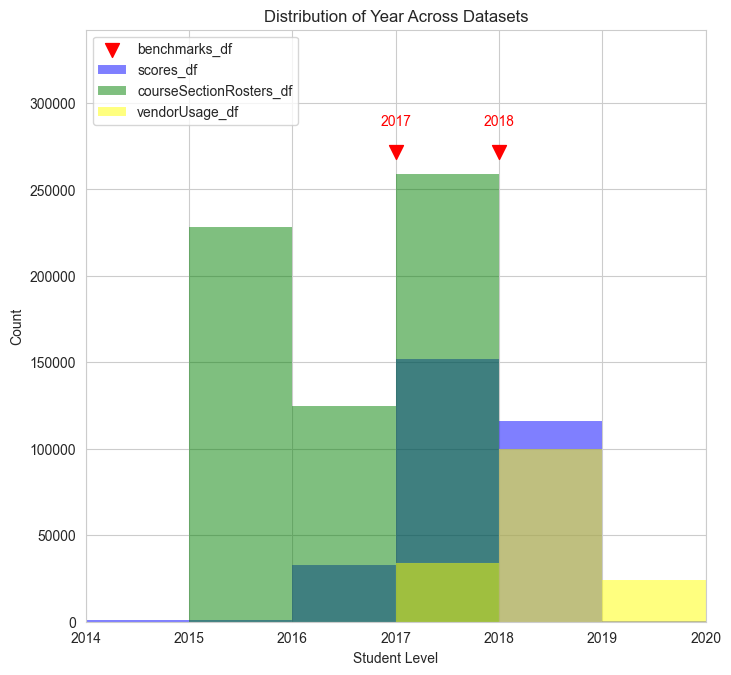

In [80]:
plt.figure(figsize=(8, 8))
sns.histplot(scores_df['year'], color='blue', alpha=0.5, label='scores_df', binwidth=1)
# sns.histplot(benchmarks_df['year'], color='red', alpha=0.5, label='benchmarks_df', binwidth=1)
sns.histplot(courseSectionRosters_df['year'], color='green', alpha=0.5, label='courseSectionRosters_df', binwidth=1)
sns.histplot(vendorUsage_df['year'], color='yellow', alpha=0.5, label='vendorUsage_df', binwidth=1)
# Benchmarks DataFrame
benchmark_years = benchmarks_df['year'].unique()
plt.scatter(benchmark_years, [plt.gca().get_ylim()[1]] * len(benchmark_years), 
            color='red', marker='v', s=100, label='benchmarks_df')



plt.title('Distribution of Year Across Datasets')
plt.xlabel('Student Level')
plt.xlim(2014, 2020)
plt.ylabel('Count')
plt.legend()

# Add text annotations for benchmark levels
for level in benchmark_years:
    plt.text(level, plt.gca().get_ylim()[1], f'{level}', 
             horizontalalignment='center', verticalalignment='bottom', color='red')

# Adjust the top of the plot to make room for markers and annotations
plt.subplots_adjust(top=0.85)

# Increase y-axis limit to create space for markers and annotations
plt.ylim(0, plt.gca().get_ylim()[1] * 1.2)

plt.show()

In [63]:
print(f"scores_df: {scores_df['studentLevel'].unique()}")
print(f"benchmarks_df: {benchmarks_df['level'].unique()}")
print(f"courseSectionRosters_df: {courseSectionRosters_df['studentLevel'].unique()}")

scores_df: [ 9  8  6  7  5 12 11 10  4  3  2  1  0 99 98 97 96 -1]
benchmarks_df: [ 3  4  5  6  7  8 11]
courseSectionRosters_df: [ 4  3  2  1  0  8  5  7  6 12 10  9 11 98 99 97 96]
scores_df: [ 9  8  6  7  5 12 11 10  4  3  2  1  0 99 98 97 96 -1]


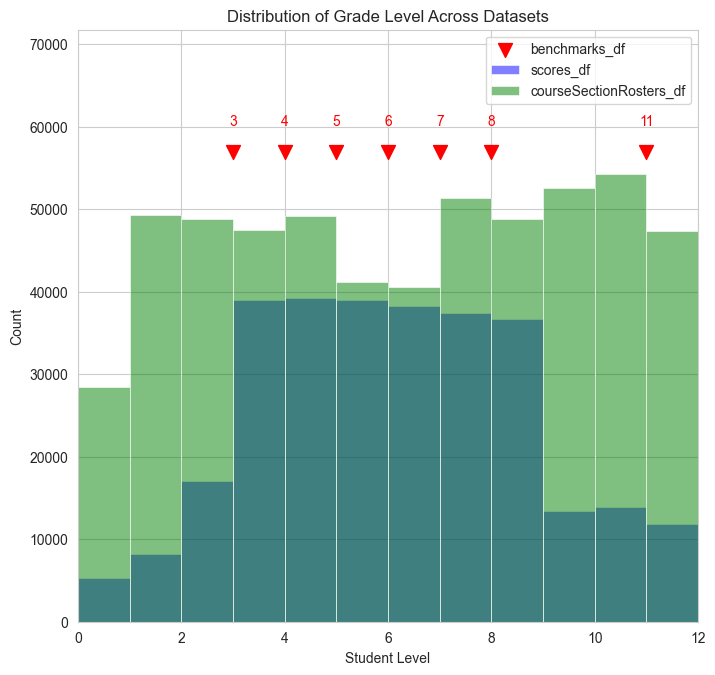

In [78]:
plt.figure(figsize=(8, 8))

sns.histplot(scores_df['studentLevel'], color='blue', alpha=0.5, label='scores_df', binwidth=1)
sns.histplot(courseSectionRosters_df['studentLevel'], color='green', alpha=0.5, label='courseSectionRosters_df', binwidth=1)

# Benchmarks DataFrame
benchmark_levels = benchmarks_df['level'].unique()
plt.scatter(benchmark_levels, [plt.gca().get_ylim()[1]] * len(benchmark_levels), 
            color='red', marker='v', s=100, label='benchmarks_df')

plt.title('Distribution of Grade Level Across Datasets')
plt.xlabel('Student Level')
plt.xlim(0, 12)
plt.ylabel('Count')
plt.legend()

# Add text annotations for benchmark levels
for level in benchmark_levels:
    plt.text(level, plt.gca().get_ylim()[1], f'{level}', 
             horizontalalignment='center', verticalalignment='bottom', color='red')

# Adjust the top of the plot to make room for markers and annotations
plt.subplots_adjust(top=0.85)

# Increase y-axis limit to create space for markers and annotations
plt.ylim(0, plt.gca().get_ylim()[1] * 1.2)

plt.show()

In [170]:
vendorStudents = set(vendorUsage_df['studentId'])
scoresStudents = set(scores_df['studentId'])
courseStudents = set(courseSectionRosters_df['studentId'])

# Find the number of students in all 3 sets
students_in_all_three = vendorStudents.intersection(scoresStudents, courseStudents)
print(f"Number of students in all three sets: {len(students_in_all_three)}")

# Find the number of students in any 2 sets
students_in_vendor_scores = vendorStudents.intersection(scoresStudents) - students_in_all_three
students_in_vendor_course = vendorStudents.intersection(courseStudents) - students_in_all_three
students_in_scores_course = scoresStudents.intersection(courseStudents) - students_in_all_three
print(f"Number of students in vendorUsage and scores only: {len(students_in_vendor_scores)}")
print(f"Number of students in vendorUsage and courseSectionRosters only: {len(students_in_vendor_course)}")
print(f"Number of students in scores and courseSectionRosters only: {len(students_in_scores_course)}")

# Find the number of students only in one set
vendor_only = vendorStudents - (scoresStudents.union(courseStudents))
scores_only = scoresStudents - (vendorStudents.union(courseStudents))
course_only = courseStudents - (vendorStudents.union(scoresStudents))
print(f"Number of students only in vendorUsage: {len(vendor_only)}")
print(f"Number of students only in scores: {len(scores_only)}")
print(f"Number of students only in courseSectionRosters: {len(course_only)}")



Number of students in all three sets: 7969
Number of students in vendorUsage and scores only: 29503
Number of students in vendorUsage and courseSectionRosters only: 331
Number of students in scores and courseSectionRosters only: 4241
Number of students only in vendorUsage: 6373
Number of students only in scores: 83510
Number of students only in courseSectionRosters: 4326
